In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pickle
import string
from nltk.corpus import stopwords
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from collections import Counter
from sklearn.feature_extraction.text import TfidfTransformer

In [62]:
df=pd.read_csv('spam.csv',encoding  = 'latin')

In [63]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [64]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [65]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis =1 ,inplace = True)

In [66]:
df.shape

(5572, 2)

In [67]:
import seaborn as sns

In [68]:
df.columns = ['Category','text']

In [69]:
df.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

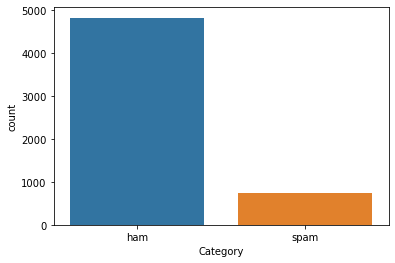

In [70]:
sns.countplot(data=df,x='Category')
plt.show()

In [71]:
df.isnull().sum()

Category    0
text        0
dtype: int64

In [72]:
df.shape

(5572, 2)

In [73]:
df.Category.value_counts()
df.replace('ham',0,inplace = True)
df.replace('spam',1,inplace = True)

In [74]:
# df_spam = df[df['Category'] == 1]
# df_ham = df[df['Category'] == 0]

In [75]:
# dataset = pd.concat([df_spam,df_ham])
# dataset.head()
dataset = df.copy()

In [76]:
dataset['text']=dataset['text'].str.lower()
# dataset2['text']=dataset2['text'].str.lower()
dataset['text'].tail()

5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: text, dtype: object

In [77]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

# Cleaning and removing repeating characters
import re
def cleaning_repeating_char(text):
#     return re.sub(r'(.)1+', r'1', text)
    return re.sub(r'([a-z])\1+', r'\1', text)

# Cleaning and removing URL’s
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

# Cleaning and removing Numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [78]:
processing_functions_list = [cleaning_stopwords,cleaning_punctuations,cleaning_numbers,cleaning_URLs,cleaning_repeating_char]
for func in processing_functions_list:
    dataset['text']= dataset['text'].apply(lambda x: func(x))
#     dataset2['text']= dataset2['text'].apply(lambda x: func(x))

In [79]:
dataset.head()

,Category,text
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,fre entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though


In [80]:
import nltk 

In [81]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\92333\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [82]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    nltk_tokens =  nltk.word_tokenize(data)
    text = ''
    for w in nltk_tokens:
        text+=st.stem(w)
        text+=' '
    return text

lm = WordNetLemmatizer()
def lemmatizer_on_text(data):
    nltk_tokens = nltk.word_tokenize(data)
    text = ''
    for w in nltk_tokens:
        text += lm.lemmatize(w)
        text += ' '
    return text

In [83]:
dataset['text'] = dataset.text.apply(lambda x : lemmatizer_on_text(x))

In [84]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\92333\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [85]:
dataset.head()

,Category,text
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,fre entry wkly comp win fa cup final tkts st m...
3,0,u dun say early hor u c already say
4,0,nah dont think go usf life around though


In [86]:
X=dataset.text
y=dataset.Category

In [87]:
X.shape

(5572,)

In [88]:
y.value_counts()

0    4825
1     747
Name: Category, dtype: int64

In [89]:
df.to_csv('mail.csv')

In [90]:
from sklearn.model_selection import GridSearchCV

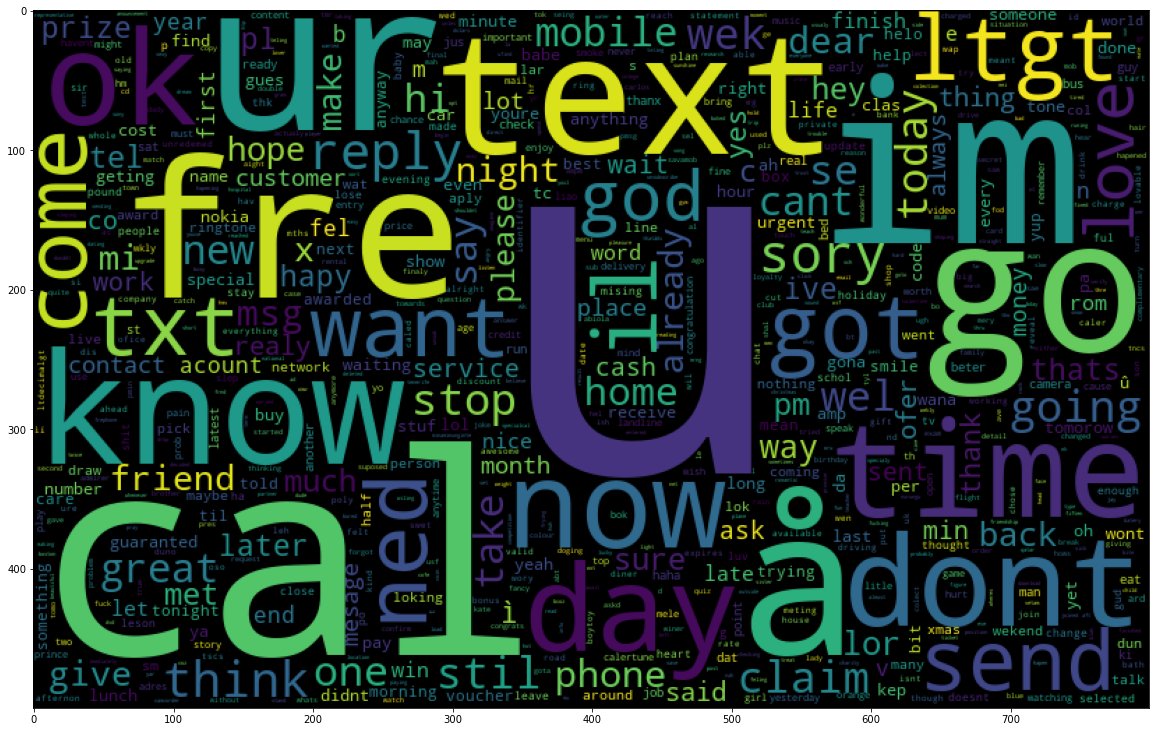

In [91]:
from wordcloud import WordCloud
df_spam = X[:1000]
wc = WordCloud(max_words = 1000 , width = 800 , height = 500,
              collocations=False).generate(" ".join(df_spam))
plt.figure(figsize = (20,20))
plt.imshow(wc)
plt.show()

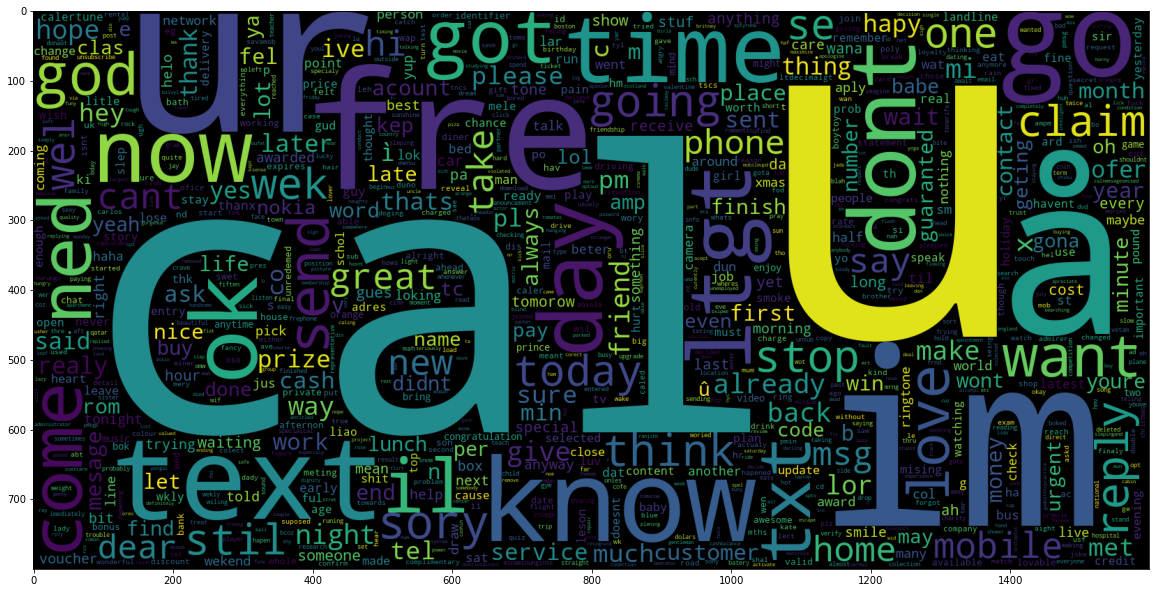

In [92]:
from wordcloud import WordCloud
df_ham = X[:1000]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(df_ham))
plt.figure(figsize = (20,20))
plt.imshow(wc)
plt.show()

In [93]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87653)

In [94]:
print(X.shape)
print(x_train.shape)
print(x_test.shape)

(5572,)
(4457,)
(1115,)


In [95]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words="english",lowercase=True)


In [96]:
x_train_feature=feature_extraction.fit_transform(x_train)
x_test_feature=feature_extraction.transform(x_test)

In [97]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [98]:
print(x_train_feature)

  (0, 543)	0.49573724854780055
  (0, 2622)	0.38275068996318423
  (0, 4888)	0.4693265029478385
  (0, 769)	0.36028884509936304
  (0, 3451)	0.5076131119885324
  (1, 2667)	0.8065212440885356
  (1, 2622)	0.5912051106290276
  (2, 3209)	0.42291705979190464
  (2, 6183)	0.5445546448318805
  (2, 5827)	0.3500585024760284
  (2, 1577)	0.3094292205105299
  (2, 3746)	0.5534564135209579
  (3, 2698)	0.7153251775123433
  (3, 1100)	0.43245971384658427
  (3, 3288)	0.5488975189565578
  (4, 3962)	0.24617881890738924
  (4, 4365)	0.2580530182964177
  (4, 1047)	0.30612537362753434
  (4, 2304)	0.30612537362753434
  (4, 2573)	0.23082480575053255
  (4, 4515)	0.30612537362753434
  (4, 2900)	0.29896341691861117
  (4, 5777)	0.23845164371009797
  (4, 3346)	0.16668927783940682
  (4, 3721)	0.28766268767373415
  :	:
  (4455, 3772)	0.37801484667195423
  (4455, 6641)	0.26180289797336004
  (4455, 5357)	0.4137951860476263
  (4455, 3405)	0.24974367174709322
  (4456, 4687)	0.3075613826087535
  (4456, 2594)	0.29324274736520434

In [99]:
from sklearn.svm import SVC

In [100]:
smodel=SVC(kernel='linear',random_state=0)

In [101]:
smodel.fit(x_train_feature,y_train)

SVC(kernel='linear', random_state=0)

In [102]:
predect_on_train_data=smodel.predict(x_train_feature)
accuracy_on_train_data=accuracy_score(y_train,predect_on_train_data)

In [103]:
print('accuracy on training data ',accuracy_on_train_data)

accuracy on training data  0.9943908458604442


In [104]:
def model_Evaluate(model):
    # Predict values for Train dataset
    predict_on_train_data = smodel.predict(x_train_feature)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_train,predict_on_train_data ))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_train,predict_on_train_data)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1} {v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3871
           1       0.99      0.96      0.98       586

    accuracy                           0.99      4457
   macro avg       0.99      0.98      0.99      4457
weighted avg       0.99      0.99      0.99      4457



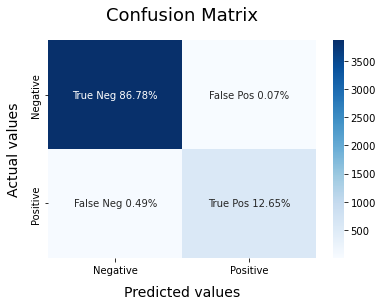

In [105]:

model_Evaluate(smodel)
plt.show()

In [106]:
predect_on_test_data=smodel.predict(x_test_feature)
accuracy_on_test_data=accuracy_score(y_test,predect_on_test_data)

In [107]:
print('accuracy on testing data ',accuracy_on_test_data)

accuracy on testing data  0.9829596412556054


In [108]:
def model_Evaluate(model):
    # Predict values for Test dataset
    predect_on_test_data = smodel.predict(x_test_feature)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test,predect_on_test_data ))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test,predect_on_test_data)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1} {v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       0.98      0.90      0.94       161

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



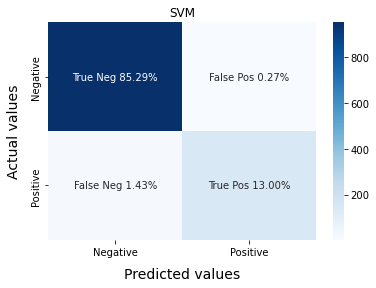

In [109]:
model_Evaluate(smodel)
plt.title("SVM")
plt.show()

In [110]:
input_mail=['07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow,,,']

In [111]:
feature=feature_extraction.transform(input_mail)

In [112]:
pred=smodel.predict(feature)
print(pred)

if (pred[0]==1):
    print("it is spam email")
else:
    print("it is ham mail")

[1]
it is spam email


In [113]:
nbmodel = None
with open('naviebayes_pickle','rb')as f:
    nbmodel = pickle.load(f)
    

In [114]:
nbmodel.predict(x_test_feature)

array([0, 0, 0, ..., 0, 0, 0])

In [115]:
import pickle

In [116]:
pickled_model = pickle.load(open('model.pkl', 'rb'))

In [117]:
pickled_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

BernoulliNB()accuracy 0.968609865470852
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       0.98      0.90      0.94       161

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



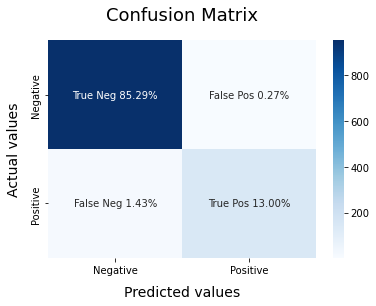

SVC(kernel='linear', random_state=0)accuracy 0.9829596412556054
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       0.98      0.90      0.94       161

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



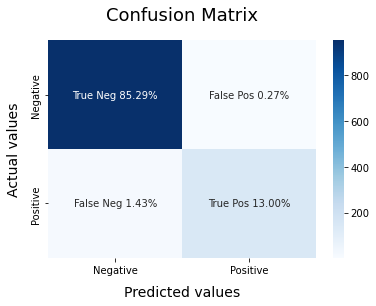

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)accuracy 0.9739910313901345
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       0.98      0.90      0.94       161

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
we

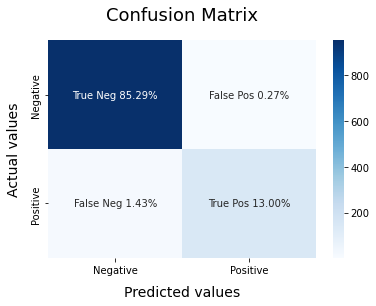

In [118]:
models = [nbmodel,smodel,pickled_model]
for i in range(len(models)):
    print(f'{models[i]}accuracy',accuracy_score(y_test,(models[i].predict(x_test_feature))))
    model_Evaluate(models[i])
    plt.show()
    

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       0.98      0.90      0.94       161

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



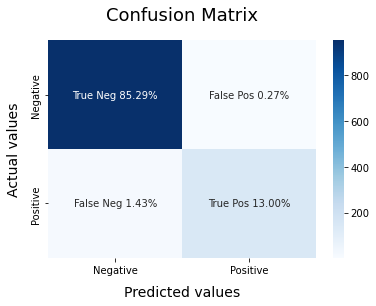

In [119]:
model_Evaluate(nbmodel)

In [120]:
accuracy_scores = [accuracy_score(y_test,mod.predict(x_test_feature))*100 for mod in models]

In [121]:
 accuracy_scores

[96.8609865470852, 98.29596412556054, 97.39910313901345]

<AxesSubplot:>

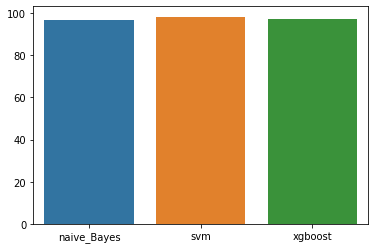

In [122]:
names = ['naive_Bayes','svm','xgboost']
sns.barplot(x = names,y=accuracy_scores)

In [123]:
import pickle

In [124]:
with open('svm_pickle','wb')as f:
    pickle.dump(smodel,f)

In [125]:
with open('svm_pickle','rb')as f:
    pickle.load(f)

In [126]:
print('accuracy on training data ',accuracy_on_train_data)

accuracy on training data  0.9943908458604442
